## Importing the relevant packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
raw_csv_data = pd.read_csv("/content/Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date",inplace=True)
df_comp = df_comp.asfreq("b")
df_comp = df_comp.fillna(method="ffill")

In [3]:
df_comp['market_value'] = df_comp.ftse

In [4]:
df_comp.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01


In [5]:
del df_comp["spx"]
del df_comp["dax"]
del df_comp["ftse"]
del df_comp["nikkei"]
size = int(len(df_comp)*0.80)
df,df_test = df_comp.iloc[:size],df_comp.iloc[size:]

## LLR Test

In [6]:
def LLR_test(mod_1,mod_2,DF=1):
  L1 = mod_1.fit().llf
  L2 = mod_2.fit().llf
  LR = (2*(L2-L1))
  p = chi2.sf(LR,DF).round(3)
  return p

## Creating Returns

In [8]:
df["returns"] = df.market_value.pct_change(1).mul(100)

In [9]:
model_ret_ar_1_ma_1 = ARMA(df.returns[1:], order=(1,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
print(results_ret_ar_1_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood               -7916.500
Method:                       css-mle   S.D. of innovations              1.171
Date:                Fri, 11 Nov 2022   AIC                          15841.000
Time:                        09:22:41   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.446      0.148      -0.007       0.045
ar.L1.returns     0.7649      0.067     11.349      0.000       0.633       0.897
ma.L1.returns    -0.8141      0.061    -

In [10]:
model_ret_ar_1 = ARMA(df.returns[1:], order=(1,0))
model_ret_ma_1 = ARMA(df.returns[1:], order=(0,1))

In [12]:
print("\nARMA vs AR " + str(LLR_test(model_ret_ar_1,model_ret_ar_1_ma_1)))
print("\nARMA vs MA " + str(LLR_test(model_ret_ma_1,model_ret_ar_1_ma_1)))


ARMA vs AR 0.0

ARMA vs MA 0.0


## Higher-Lag ARMA Model

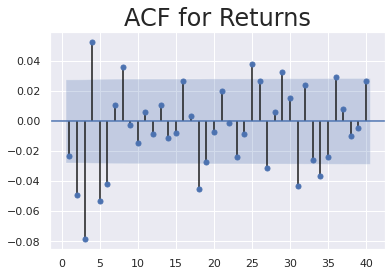

In [14]:
sgt.plot_acf(df.returns[1:], lags = 40, zero= False)
plt.title("ACF for Returns",size=24)
plt.show()

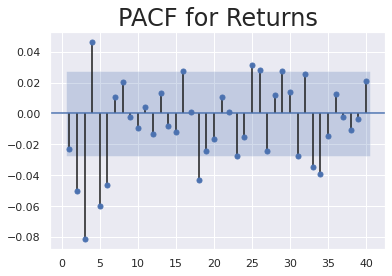

In [15]:
sgt.plot_pacf(df.returns[1:], lags = 40, zero= False, method=("ols"))
plt.title("PACF for Returns",size=24)
plt.show()

In [18]:
model_ret_ar_3_ma_3 = ARMA(df.returns[1:], order=(3,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()
print(results_ret_ar_3_ma_3.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 3)   Log Likelihood               -7893.515
Method:                       css-mle   S.D. of innovations              1.166
Date:                Fri, 11 Nov 2022   AIC                          15803.030
Time:                        09:48:13   BIC                          15855.199
Sample:                    01-10-1994   HQIC                         15821.310
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.395      0.163      -0.008       0.045
ar.L1.returns    -0.1898      0.104     -1.827      0.068      -0.393       0.014
ar.L2.returns    -0.2942      0.087     

In [19]:
print("\nLLR Test " + str(LLR_test(model_ret_ar_1_ma_1,model_ret_ar_3_ma_3,DF=4)))


LLR Test 0.0


In [20]:
model_ret_ar_3_ma_2 = ARMA(df.returns[1:], order=(3,2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
print(results_ret_ar_3_ma_2.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 2)   Log Likelihood               -7895.747
Method:                       css-mle   S.D. of innovations              1.166
Date:                Fri, 11 Nov 2022   AIC                          15805.495
Time:                        09:52:02   BIC                          15851.143
Sample:                    01-10-1994   HQIC                         15821.491
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.251      0.211      -0.011       0.048
ar.L1.returns    -0.6785      0.087     -7.799      0.000      -0.849      -0.508
ar.L2.returns    -0.5088      0.139     

In [22]:
model_ret_ar_2_ma_3 = ARMA(df.returns[1:], order=(2,3))
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()
print(results_ret_ar_2_ma_3.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 3)   Log Likelihood               -7895.587
Method:                       css-mle   S.D. of innovations              1.166
Date:                Fri, 11 Nov 2022   AIC                          15805.174
Time:                        09:55:58   BIC                          15850.823
Sample:                    01-10-1994   HQIC                         15821.170
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.276      0.202      -0.010       0.048
ar.L1.returns    -0.5605      0.090     -6.245      0.000      -0.736      -0.385
ar.L2.returns    -0.4187      0.193     

In [23]:
print("\nLLR Test " + str(LLR_test(model_ret_ar_2_ma_3,model_ret_ar_3_ma_3)))


LLR Test 0.042


In [24]:
model_ret_ar_3_ma_1 = ARMA(df.returns[1:], order=(3,1))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()
print(results_ret_ar_3_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 1)   Log Likelihood               -7899.072
Method:                       css-mle   S.D. of innovations              1.167
Date:                Fri, 11 Nov 2022   AIC                          15810.144
Time:                        09:58:39   BIC                          15849.271
Sample:                    01-10-1994   HQIC                         15823.855
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.298      0.194      -0.010       0.047
ar.L1.returns    -0.5077      0.088     -5.769      0.000      -0.680      -0.335
ar.L2.returns    -0.0638      0.016     

In [26]:
print("\nLLR Test " + str(LLR_test(model_ret_ar_3_ma_1,model_ret_ar_3_ma_2)))


LLR Test 0.01


In [27]:
model_ret_ar_2_ma_2 = ARMA(df.returns[1:], order=(2,2))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
print(results_ret_ar_2_ma_2.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 2)   Log Likelihood               -7913.223
Method:                       css-mle   S.D. of innovations              1.170
Date:                Fri, 11 Nov 2022   AIC                          15838.446
Time:                        10:00:44   BIC                          15877.573
Sample:                    01-10-1994   HQIC                         15852.156
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.394      0.163      -0.008       0.045
ar.L1.returns     0.7820      0.238      3.284      0.001       0.315       1.249
ar.L2.returns    -0.1563      0.177     

In [28]:
model_ret_ar_1_ma_3 = ARMA(df.returns[1:], order=(1,3))
results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()
print(results_ret_ar_1_ma_3.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 3)   Log Likelihood               -7896.838
Method:                       css-mle   S.D. of innovations              1.167
Date:                Fri, 11 Nov 2022   AIC                          15805.676
Time:                        10:01:48   BIC                          15844.803
Sample:                    01-10-1994   HQIC                         15819.386
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.332      0.183      -0.009       0.047
ar.L1.returns    -0.4699      0.096     -4.901      0.000      -0.658      -0.282
ma.L1.returns     0.4474      0.095     

In [31]:
print("\n ARMA(3,2): \tLL = ", results_ret_ar_3_ma_2.llf,"\tAIC = ", results_ret_ar_3_ma_2.aic)
print("\n ARMA(1,3): \tLL = ",results_ret_ar_1_ma_3.llf ,"\tAIC = ", results_ret_ar_1_ma_3.aic)


 ARMA(3,2): 	LL =  -7895.747458514506 	AIC =  15805.494917029013

 ARMA(1,3): 	LL =  -7896.837893752919 	AIC =  15805.675787505837


## Residuals for Return

In [32]:
df['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid[1:]

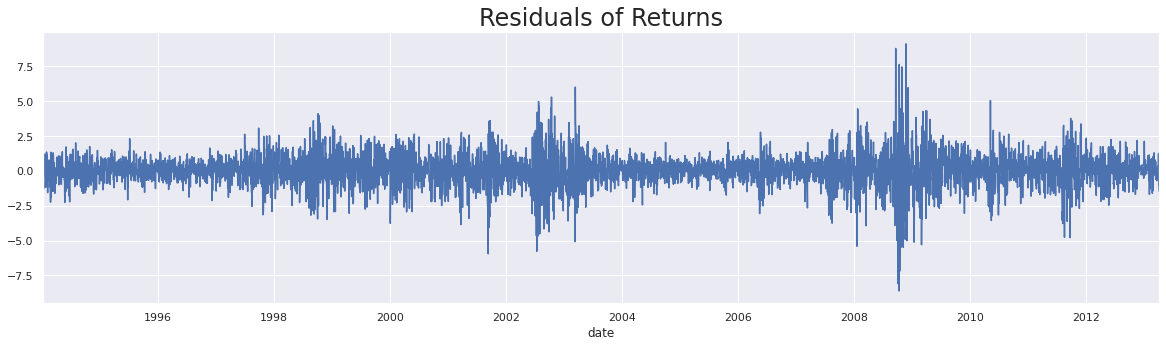

In [33]:
df.res_ret_ar_3_ma_2[1:].plot(figsize=(20,5))
plt.title("Residuals of Returns", size = 24)
plt.show()

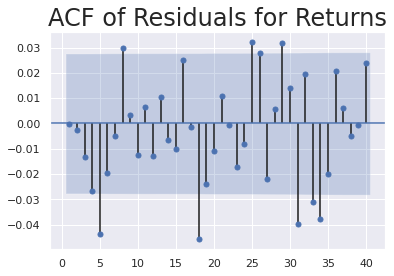

In [35]:
sgt.plot_acf(df.res_ret_ar_3_ma_2[2:], lags = 40, zero= False)
plt.title("ACF of Residuals for Returns",size=24)
plt.show()

##Reevaluating Model Selection

In [36]:
model_ret_ar_5_ma_5 = ARMA(df.returns[1:], order=(5,5))
results_ret_ar_5_ma_5 = model_ret_ar_5_ma_5.fit()
print(results_ret_ar_5_ma_5.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 5)   Log Likelihood               -7882.160
Method:                       css-mle   S.D. of innovations              1.163
Date:                Fri, 11 Nov 2022   AIC                          15788.321
Time:                        10:14:32   BIC                          15866.575
Sample:                    01-10-1994   HQIC                         15815.742
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.402      0.161      -0.008       0.045
ar.L1.returns    -0.0684      0.140     -0.490      0.624      -0.342       0.205
ar.L2.returns    -0.6722      0.146     

In [37]:
model_ret_ar_5_ma_1 = ARMA(df.returns[1:], order=(5,1))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
print(results_ret_ar_5_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 1)   Log Likelihood               -7889.311
Method:                       css-mle   S.D. of innovations              1.165
Date:                Fri, 11 Nov 2022   AIC                          15794.623
Time:                        10:15:45   BIC                          15846.792
Sample:                    01-10-1994   HQIC                         15812.903
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.407      0.159      -0.007       0.045
ar.L1.returns     0.3440      0.131      2.624      0.009       0.087       0.601
ar.L2.returns    -0.0458      0.015     

In [38]:
model_ret_ar_1_ma_5 = ARMA(df.returns[1:], order=(1,5))
results_ret_ar_1_ma_5 = model_ret_ar_1_ma_5.fit()
print(results_ret_ar_1_ma_5.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 5)   Log Likelihood               -7890.973
Method:                       css-mle   S.D. of innovations              1.165
Date:                Fri, 11 Nov 2022   AIC                          15797.947
Time:                        10:16:29   BIC                          15850.116
Sample:                    01-10-1994   HQIC                         15816.228
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.419      0.156      -0.007       0.045
ar.L1.returns     0.3285      0.152      2.159      0.031       0.030       0.627
ma.L1.returns    -0.3534      0.152     

In [39]:
print("\n ARMA(5,1): \tLL = ", results_ret_ar_5_ma_1.llf,"\tAIC = ", results_ret_ar_5_ma_1.aic)
print("\n ARMA(1,5): \tLL = ",results_ret_ar_1_ma_5.llf ,"\tAIC = ", results_ret_ar_1_ma_5.aic)


 ARMA(5,1): 	LL =  -7889.31128294623 	AIC =  15794.62256589246

 ARMA(1,5): 	LL =  -7890.973460209589 	AIC =  15797.946920419177


In [40]:
print("\n ARMA(3,2): \tLL = ",results_ret_ar_3_ma_2.llf ,"\tAIC = ", results_ret_ar_3_ma_2.aic)


 ARMA(3,2): 	LL =  -7895.747458514506 	AIC =  15805.494917029013


## Residuals for the New Model

In [41]:
df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid[1:]

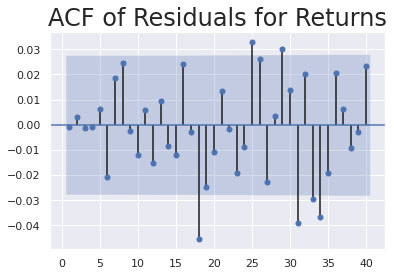

In [43]:
sgt.plot_acf(df.res_ret_ar_5_ma_1[2:], lags = 40, zero= False)
plt.title("ACF of Residuals for Returns",size=24)
plt.show()

## ARMA Models for Prices

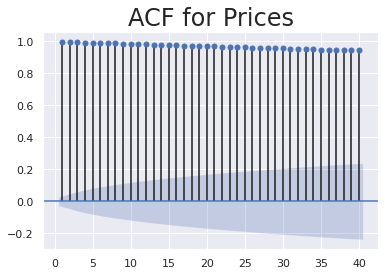

In [44]:
sgt.plot_acf(df.market_value, unbiased=True, lags = 40, zero= False)
plt.title("ACF for Prices",size=24)
plt.show()

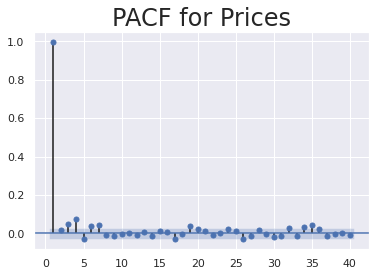

In [45]:
sgt.plot_pacf(df.market_value, alpha=0.05, lags = 40, zero= False, method=("ols"))
plt.title("PACF for Prices",size=24)
plt.show()

In [48]:
model_ar_1_ma_1 = ARMA(df.market_value, order=(1,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
print(results_ar_1_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 1)   Log Likelihood              -27621.784
Method:                       css-mle   S.D. of innovations             59.248
Date:                Fri, 11 Nov 2022   AIC                          55251.568
Time:                        10:37:27   BIC                          55277.654
Sample:                    01-07-1994   HQIC                         55260.709
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5031.5678    496.810     10.128      0.000    4057.837    6005.298
ar.L1.market_value     0.9985      0.001   1324.999      0.000       0.997       1.000
ma.L1.market_value  

In [49]:
df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid

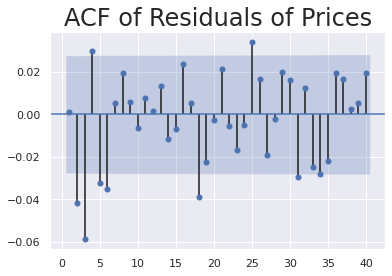

In [50]:
sgt.plot_acf(df.res_ar_1_ma_1, unbiased=True, lags = 40, zero= False)
plt.title("ACF of Residuals of Prices",size=24)
plt.show()

In [56]:
model_ar_6_ma_6 = ARMA(df.market_value, order=(6,6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit(start_ar_lags=11)
print(results_ar_6_ma_6.summary())

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 6)   Log Likelihood              -27587.932
Method:                       css-mle   S.D. of innovations             58.849
Date:                Fri, 11 Nov 2022   AIC                          55203.864
Time:                        10:41:20   BIC                          55295.164
Sample:                    01-07-1994   HQIC                         55235.856
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6488    568.148      8.958      0.000    3976.100    6203.198
ar.L1.market_value     1.9272      0.032     59.876      0.000       1.864       1.990
ar.L2.market_value  

In [57]:
model_ar_5_ma_6 = ARMA(df.market_value, order=(5,6))
results_ar_5_ma_6 = model_ar_5_ma_6.fit(start_ar_lags=7)
print(results_ar_5_ma_6.summary())

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 6)   Log Likelihood              -27587.863
Method:                       css-mle   S.D. of innovations             58.849
Date:                Fri, 11 Nov 2022   AIC                          55201.726
Time:                        10:43:13   BIC                          55286.504
Sample:                    01-07-1994   HQIC                         55231.433
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6464    580.870      8.762      0.000    3951.163    6228.130
ar.L1.market_value     1.3584      0.177      7.655      0.000       1.011       1.706
ar.L2.market_value  

In [58]:
model_ar_6_ma_1 = ARMA(df.market_value, order=(6,1))
results_ar_6_ma_1 = model_ar_6_ma_1.fit(start_ar_lags=7)
print(results_ar_6_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 1)   Log Likelihood              -27594.195
Method:                       css-mle   S.D. of innovations             58.923
Date:                Fri, 11 Nov 2022   AIC                          55206.389
Time:                        10:44:34   BIC                          55265.082
Sample:                    01-07-1994   HQIC                         55226.956
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6419    586.495      8.678      0.000    3940.133    6239.151
ar.L1.market_value     1.3921      0.058     23.929      0.000       1.278       1.506
ar.L2.market_value  

In [60]:
print("\n ARMA(5,6): \tLL = ", results_ar_5_ma_6.llf,"\tAIC = ", results_ar_5_ma_6.aic)
print("\n ARMA(6,1): \tLL = ",results_ar_6_ma_1.llf ,"\tAIC = ", results_ar_6_ma_1.aic)


 ARMA(5,6): 	LL =  -27587.86294825482 	AIC =  55201.72589650964

 ARMA(6,1): 	LL =  -27594.19457096373 	AIC =  55206.38914192746


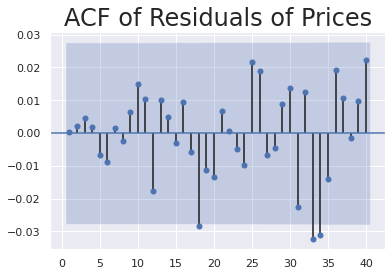

In [61]:
df['res_ar_5_ma_6'] = results_ar_5_ma_6.resid
sgt.plot_acf(df.res_ar_5_ma_6, unbiased=True, lags = 40, zero= False)
plt.title("ACF of Residuals of Prices",size=24)
plt.show()

## ARMA for Returns vs ARMA for Prices

In [62]:
print("\n ARMA(5,6): \tLL = ", results_ar_5_ma_6.llf,"\tAIC = ", results_ar_5_ma_6.aic)
print("\n ARMA(5,1): \tLL = ",results_ret_ar_5_ma_1.llf ,"\tAIC = ", results_ret_ar_5_ma_1.aic)


 ARMA(5,6): 	LL =  -27587.86294825482 	AIC =  55201.72589650964

 ARMA(5,1): 	LL =  -7889.31128294623 	AIC =  15794.62256589246
